In [2]:
# global import

import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

In [50]:
# 4.1 VGG16 Model Parameter

# Read image file
img = cv2.imread('bird.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
img = cv2.resize(img, (224, 224))

# -- Step 2
# Load VGG16 model from tensorflow.keras
model = VGG16()
# model detail
model.summary()

# -- Step 3
# retrieve kernel weights from the 1st Convolutional layer
kernels, biases = model.layers[1].get_weights()
# View CNN layer 1 architecture
model.layers[1].get_config()

# -- Step 4
# Preprocess Image using keras and numpy
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample’
# -> reshape 3D(H,W,Ch) image to 4D image (sample,H,W,Ch)
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img_ready = preprocess_input(img)

# -- Step 5
# Extract Model CNN Layer 1
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

# -- Step 6
# Extract Results from CNN Layer 1 called feature map (shape = (sample = 1, 224, 224, n_filters) )
# CNN Layer 1 -> n_filters = 64
feature_maps = model.predict(img_ready)

# -- Step 7
# Display images of feature_maps
# Subplot() 8 x 8 images

(194, 259, 3)
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128

In [5]:
print(feature_maps)

[[[[223.87314    14.107296    1.2980492 ...  80.84531     0.
      0.9343884]
   [138.31485    29.908443    0.        ... 120.65382     0.
      0.       ]
   [117.13942    31.547514    0.        ... 107.217155    0.
      0.       ]
   ...
   [111.18009    69.18073     0.        ...  54.390095    0.
      0.       ]
   [101.66316    65.5799      0.        ...  67.35724     0.
      0.       ]
   [  0.         43.49731     0.        ...  40.366596    0.
      0.       ]]

  [[122.94129    24.199327   21.249144  ... 125.17887   137.8768
     81.7871   ]
   [  0.         49.29213     0.        ... 180.83052     0.
      0.       ]
   [  0.         51.208874    0.        ... 160.08603     0.
      0.       ]
   ...
   [ 45.259968  103.34682     5.7568884 ...  83.99928    50.032352
     27.043964 ]
   [  6.462285   98.969894    0.        ... 104.77676    12.799887
      0.       ]
   [  0.         66.62705     0.        ...  66.441574    0.
      0.       ]]

  [[102.01033    26.217052   1

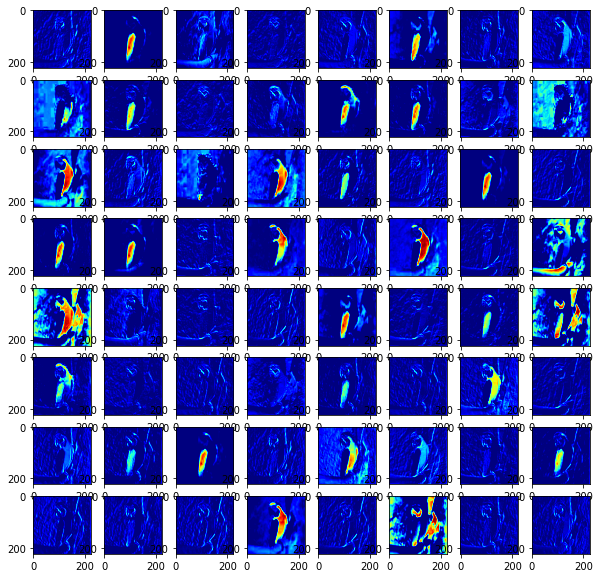

In [51]:
fig = plt.figure(figsize=(10, 10))
Size = 8
ix = 1
for _ in range(Size):
		for _ in range(Size):
				fig.add_subplot(Size, Size, ix)
				plt.imshow(feature_maps[0, :, :, ix-1], cmap="jet")
				ix += 1
# show the figure
plt.show()

In [14]:
img3 = cv2.imread('bird.jpeg')
print(img3)

[[[ 28  36  53]
  [ 32  40  57]
  [ 39  47  64]
  ...
  [ 47  77 102]
  [ 49  77 101]
  [ 49  77 101]]

 [[ 34  42  59]
  [ 39  47  64]
  [ 46  54  71]
  ...
  [ 48  77 104]
  [ 50  78 102]
  [ 50  77 103]]

 [[ 43  51  68]
  [ 49  57  74]
  [ 57  65  82]
  ...
  [ 49  77 107]
  [ 49  79 104]
  [ 49  78 105]]

 ...

 [[ 54  82  99]
  [ 52  82  99]
  [ 55  82 102]
  ...
  [ 21  47  54]
  [ 16  40  46]
  [  8  32  38]]

 [[ 45  77  88]
  [ 43  77  90]
  [ 45  76  91]
  ...
  [ 10  31  39]
  [ 12  31  39]
  [ 12  31  39]]

 [[ 43  79  87]
  [ 43  79  87]
  [ 43  77  90]
  ...
  [ 13  29  41]
  [ 13  30  39]
  [ 13  30  39]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


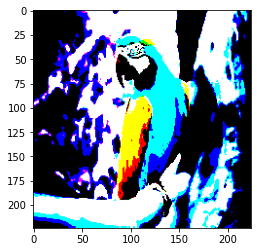

In [48]:
# 4.2 Image Preparation (from scratch)

# Image reshape from 3D image (H, W, Ch) -> 4D image (1, H, W, Ch)
img2 = cv2.imread('bird.jpeg')
img2 = cv2.resize(img2, (224, 224))

# [123.68, 116.779, 103.939]
# R G B
img2 = img2.astype("float")
img_mean = [103.939, 116.779, 123.68]
# B G R
for h in range(0,224):
  for w in range(0, 224):
    for c in range(0, 3):
      img2[h][w][c] = img2[h][w][c] - img_mean[c]

plt.imshow(img2, cmap="jet")

img2 = img2.reshape((1,) + img2.shape)

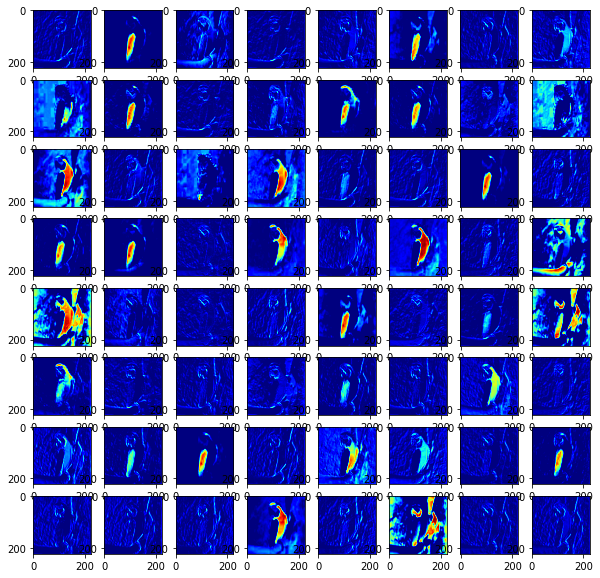

In [52]:
# 4.3 Cov2D
Size = 8
fig = plt.figure(figsize=(10, 10))
Img_result = np.zeros((224,224,3))
for l in range(0, 64):
  for c in range(0, 3):
    Img_result[: , :, c] = signal.convolve2d( img2[0, : , : , c], kernels[: , : , c, l] , mode='same',boundary='fill', fillvalue=0)    
  Image_sum = Img_result[ : , : , 0] + Img_result[ : , : , 1] + Img_result[ : , : , 2]
  # print(Image_sum)
  Image_sum = np.where(Image_sum < 0, 0, Image_sum)
  # print(Image_sum)
  fig.add_subplot(Size, Size, l+1)
  plt.imshow(Image_sum, cmap="jet")